In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

In [3]:
dados = pd.read_csv('/kaggle/input/price-us-dolar-to-brazilian-real-1994-2022/dolar_variacao_19940701.csv', encoding='UTF-8')

In [4]:
dados.head()

,data,valor
0,01/07/1994,"0,9"
1,04/07/1994,"0,935"
2,05/07/1994,"0,927"
3,06/07/1994,"0,91"
4,07/07/1994,"0,905"


In [5]:
dados.dtypes

data     object
valor    object
dtype: object

In [5]:
dados['valor'] = dados['valor'].str.replace(',','.').astype(float)

In [6]:
dados['data'] = pd.to_datetime(dados['data'], dayfirst=True)

In [7]:
dados['ano'] = dados['data'].dt.year

In [8]:
# Criando a coluna 'presidente':
dados['presidente'] = str()

In [9]:
# Removendo as linhas referente a 1994 e de 2023.
df_excluir = dados.loc[dados['ano'] == 1994] 
df_excluir2 = dados.loc[dados['ano'] == 2023]
dados = dados.drop(df_excluir.index)
dados = dados.drop(df_excluir2.index)

In [10]:
dados.head()

,data,valor,ano,presidente
126,1995-01-02,0.843,1995,
127,1995-01-03,0.844,1995,
128,1995-01-04,0.844,1995,
129,1995-01-05,0.842,1995,
130,1995-01-06,0.839,1995,


In [11]:
# Preenchendo a coluna 'presidente':
dados.loc[dados['ano'] == 1995, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 1996, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 1997, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 1998, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 1999, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 2000, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 2001, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 2002, 'presidente'] = 'FHC'
dados.loc[dados['ano'] == 2003, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2004, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2005, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2006, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2007, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2008, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2009, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2010, 'presidente'] = 'Lula'
dados.loc[dados['ano'] == 2011, 'presidente'] = 'Dilma'
dados.loc[dados['ano'] == 2012, 'presidente'] = 'Dilma'
dados.loc[dados['ano'] == 2013, 'presidente'] = 'Dilma'
dados.loc[dados['ano'] == 2014, 'presidente'] = 'Dilma'
dados.loc[dados['ano'] == 2015, 'presidente'] = 'Dilma'
dados.loc[dados['ano'] == 2016, 'presidente'] = 'Dilma'
dados.loc[dados['ano'] == 2017, 'presidente'] = 'Temer'
dados.loc[dados['ano'] == 2018, 'presidente'] = 'Temer'
dados.loc[dados['ano'] == 2019, 'presidente'] = 'Bolsonaro'
dados.loc[dados['ano'] == 2020, 'presidente'] = 'Bolsonaro'
dados.loc[dados['ano'] == 2021, 'presidente'] = 'Bolsonaro'
dados.loc[dados['ano'] == 2022, 'presidente'] = 'Bolsonaro'
dados.loc[dados['ano'] == 2023, 'presidente'] = 'Lula'

In [12]:
dados.head()

,data,valor,ano,presidente
126,1995-01-02,0.843,1995,FHC
127,1995-01-03,0.844,1995,FHC
128,1995-01-04,0.844,1995,FHC
129,1995-01-05,0.842,1995,FHC
130,1995-01-06,0.839,1995,FHC


In [13]:
dados.shape

(7028, 4)

In [14]:
# Transformando a coluna 'presidente' em variaveis dummy com o one-hot encoding:
dados_presidentes = pd.get_dummies(dados['presidente'])

In [15]:
# resetamos o index para criar a coluna index no dataset 'dados_presidentes' para podermos executarmos o merge entre as tabelas:
dados_presidentes = pd.DataFrame(dados_presidentes).reset_index()

In [16]:
# resetamos o index para criar a coluna index no dataset 'dados' para podermos executarmos o merge entre as tabelas:
dados = dados.reset_index()

In [17]:
dados.head()

,index,data,valor,ano,presidente
0,126,1995-01-02,0.843,1995,FHC
1,127,1995-01-03,0.844,1995,FHC
2,128,1995-01-04,0.844,1995,FHC
3,129,1995-01-05,0.842,1995,FHC
4,130,1995-01-06,0.839,1995,FHC


In [18]:
dados_presidentes.head()

,index,Bolsonaro,Dilma,FHC,Lula,Temer
0,126,0,0,1,0,0
1,127,0,0,1,0,0
2,128,0,0,1,0,0
3,129,0,0,1,0,0
4,130,0,0,1,0,0


In [19]:
print(dados.shape)
print(dados_presidentes.shape)

(7028, 5)
(7028, 6)


In [20]:
# Usamos o 'merge' (como se fosse um 'join') e unimos as tabelas pela coluna 'index' que criamos anteriormente:
df1 = pd.merge(dados, dados_presidentes, on=['index'])

In [21]:
# Deletamos a coluna 'index':
df1.drop(['index'], axis=1, inplace=True)

In [22]:
df1.shape

(7028, 9)

In [23]:
df1.head()

,data,valor,ano,presidente,Bolsonaro,Dilma,FHC,Lula,Temer
0,1995-01-02,0.843,1995,FHC,0,0,1,0,0
1,1995-01-03,0.844,1995,FHC,0,0,1,0,0
2,1995-01-04,0.844,1995,FHC,0,0,1,0,0
3,1995-01-05,0.842,1995,FHC,0,0,1,0,0
4,1995-01-06,0.839,1995,FHC,0,0,1,0,0


In [24]:
import sklearn as sk 
from sklearn.model_selection import train_test_split
import seaborn as sns

C:\Users\Pichau\AppData\Local\Temp\ipykernel_10404\1755066771.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

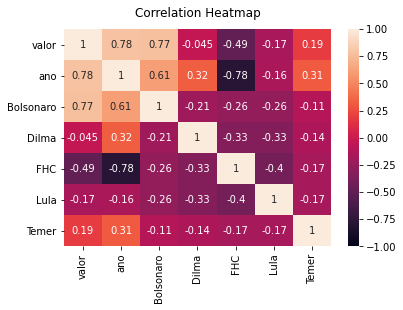

In [25]:
# Correlação entre as variáveis:
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [26]:
#Selecionando as varáveis preditoras e a target:
preditoras = ['ano', 'Bolsonaro', 'Dilma', 'FHC', 'Lula', 'Temer']
alvo = ['valor']

In [27]:
#Atribuindo os dados das variaveis preditoras e target
X = df1[preditoras].values
Y = df1[alvo].values

In [28]:
# Criando dados de treino e de teste 
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 52)

In [29]:
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(4919, 6) (2109, 6) (4919, 1) (2109, 1)


In [30]:
# Imprimindo as divisões das bases (treino e teste de X):
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df1.index)) * 100)) 
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df1.index)) * 100)) 

69.99% nos dados de treino
30.01% nos dados de teste


In [31]:
# Imprimindo as divisões das bases (treino e teste de Y):
print("{0:0.2f}% nos dados de treino".format((len(Y_treino)/len(df1.index)) * 100)) 
print("{0:0.2f}% nos dados de teste".format((len(Y_teste)/len(df1.index)) * 100)) 

69.99% nos dados de treino
30.01% nos dados de teste


In [32]:
# Cria o modelo de regressão linear com single output
from sklearn import linear_model 
regr = linear_model.LinearRegression()

In [33]:
# Treinamento do Modelo
regr.fit(X_treino, Y_treino)

LinearRegression()

In [34]:
#Previsao do modelo
previsao = regr.predict(X_teste)

In [35]:
# Transformação do split Y_teste em Dataframe
df_Y_teste = pd.DataFrame(Y_teste,  
             columns=['Valor_Real'])

In [36]:
# Transformação da previsao em Dataframe
df_previsao = pd.DataFrame(previsao,  
             columns=['Valor_Previsto'])

In [37]:
print(df_Y_teste.shape)
print(df_previsao.shape)

(2109, 1)
(2109, 1)


In [38]:
print(type(df_Y_teste)) 
print(type(df_previsao)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
print(df_Y_teste.dtypes)
print(df_previsao.dtypes)

Valor_Real    float64
dtype: object
Valor_Previsto    float64
dtype: object


In [40]:
df_Y_teste.head()

,Valor_Real
0,1.0382
1,0.9575
2,2.7282
3,3.8297
4,2.3449


In [41]:
df_previsao.head()

,Valor_Previsto
0,1.337186
1,1.218924
2,1.928494
3,4.740634
4,2.447786


In [42]:
# Calcula a performance do modelo 
score = regr.score(X_teste, Y_teste)
score

0.7706114047479086

In [43]:
# R^2 - Performance do modelo
######################################
from sklearn.metrics import r2_score
r2_score(Y_teste, previsao)

0.7706114047479086

In [44]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((Y_teste - previsao) ** 2)
print(mse1)

0.335252863900401


In [45]:
########################################################################################
# Testando o modelo com novos dados:
objeto = {'ano': [2020, 2021, 2022, 2023, 2024], 'Bolsonaro': [0, 0, 0, 0, 0], 'Dilma': [0, 0, 0, 0, 0], 'FHC':[0, 0, 0, 0, 0], 'Lula':[1, 1, 1, 1, 1], 'Temer':[0, 0, 0, 0, 0]}
novos_dados = pd.DataFrame(data=objeto)

In [46]:
# Prevendo os valores:
regr.predict(novos_dados)

C:\Users\Pichau\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[3.86692619],
       [3.98518792],
       [4.10344964],
       [4.22171136],
       [4.33997308]])

In [47]:
########################################################################################
# Agrupando a média, o minimo e o máximo de valor por presidente:
valor_media = pd.DataFrame(df1.groupby('presidente')['valor'].mean())
valor_min = pd.DataFrame(df1.groupby('presidente')['valor'].min())
valor_max = pd.DataFrame(df1.groupby('presidente')['valor'].max())

In [48]:
# remover o indice:
valor_media = valor_media.reset_index()
valor_min = valor_min.reset_index()
valor_max = valor_max.reset_index()

In [49]:
# ordenando o dataset pela coluna valor
valor_media = valor_media.sort_values(by=['valor'])
valor_min = valor_min.sort_values(by=['valor'])
valor_max = valor_max.sort_values(by=['valor'])

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


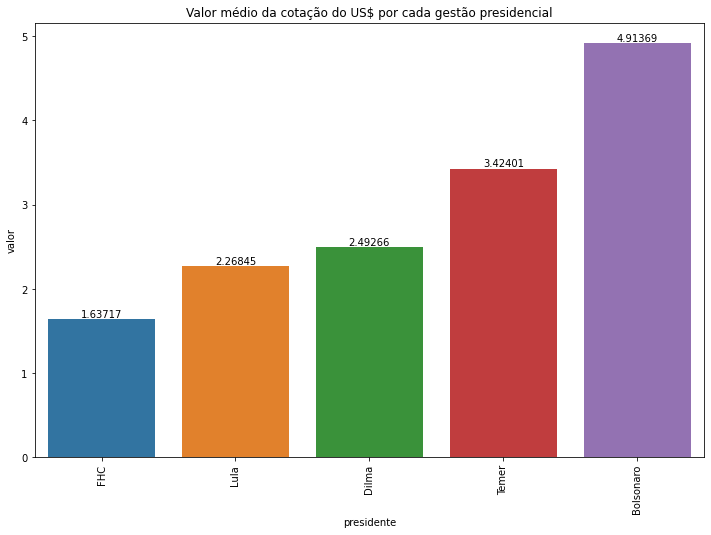

In [50]:
#Plotagem da média de valor da cotação do US$ por presidente:
plt.figure(figsize = (12,8)) 
ax = sns.barplot(valor_media['presidente'],valor_media['valor'], order=valor_media.sort_values('valor').presidente) 
ax.bar_label(ax.containers[0]) 
plt.xticks(rotation = 90) 
plt.title('Valor médio da cotação do US$ por cada gestão presidencial')
plt.show()

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


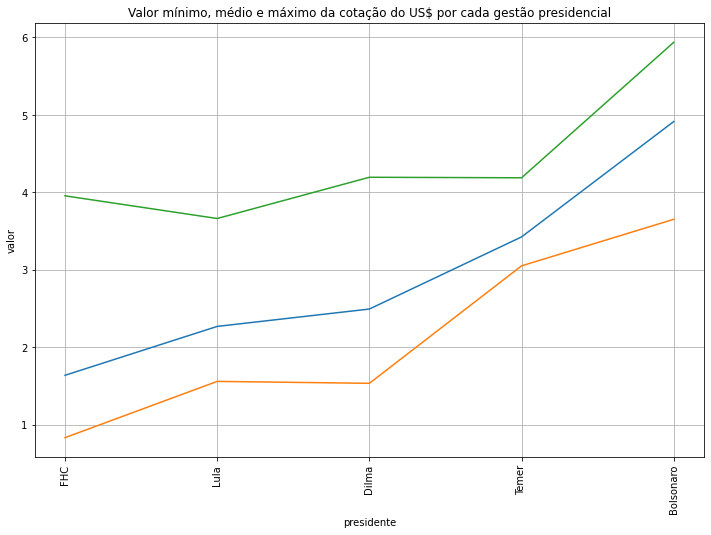

In [51]:
# Valor mínimo, médio e máximo da cotação do US$ por cada gestão presidencial:

plt.figure(figsize = (12,8))
sns.lineplot(valor_media['presidente'],valor_media['valor'])
sns.lineplot(valor_min['presidente'],valor_min['valor'])
sns.lineplot(valor_max['presidente'],valor_max['valor'])
plt.xticks(rotation = 90) 
plt.title('Valor mínimo, médio e máximo da cotação do US$ por cada gestão presidencial')
plt.grid() 
plt.show() 

In [52]:
# Tempo de gestão de cada Presidente e transformação em dataframe:
tempo_presidente = pd.DataFrame(df1.groupby('presidente')['ano'].nunique())

In [53]:
# remover o indice:
tempo_presidente = tempo_presidente.reset_index()

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


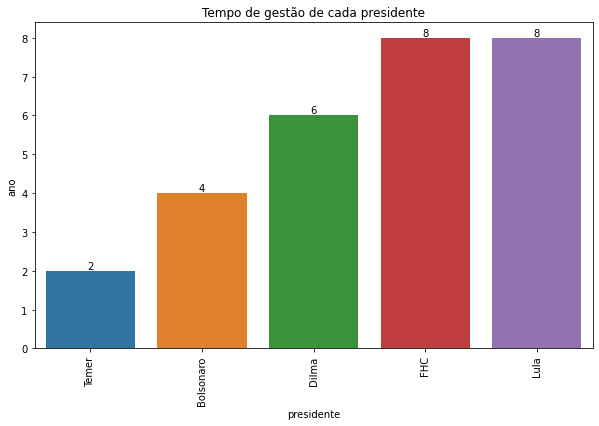

In [54]:
#Plotagem da média de valor da cotação do US$ por presidente:
plt.figure(figsize = (10,6)) 
ax = sns.barplot(tempo_presidente['presidente'],tempo_presidente['ano'], order=tempo_presidente.sort_values('ano').presidente) 
ax.bar_label(ax.containers[0]) 
plt.xticks(rotation = 90) 
plt.title('Tempo de gestão de cada presidente')
plt.show()
